# AAL3 for PPMI dataset, case study A

All the imports and installs we'll need.


In [28]:
import os
#import torch
#from torch import nn
import numpy as np
import matplotlib.pyplot as plt
#from tqdm import tqdm

from nilearn import datasets
from nilearn import plotting
from nilearn.input_data import NiftiMapsMasker
from nilearn.connectome import ConnectivityMeasure

#import torch.nn.functional as F
#from torch.nn import Sequential, Linear, ReLU, GRU, BatchNorm1d
#from torch_geometric.nn import EdgeConv, GCNConv, GraphConv
#from torch_geometric.nn import global_mean_pool
#from torch_geometric.data import InMemoryDataset, Data, DataLoader
#from torch_geometric.utils import from_networkx

import numpy as np
import matplotlib.pyplot as plt
#from tqdm import tqdm

from nilearn import datasets
from nilearn import plotting
from nilearn.input_data import NiftiMapsMasker
from nilearn.connectome import ConnectivityMeasure

#import torch.nn.functional as F
#from torch.nn import Sequential, Linear, ReLU, GRU, BatchNorm1d
#from torch_geometric.nn import EdgeConv, GCNConv, GraphConv
#from torch_geometric.nn import global_mean_pool
#from torch_geometric.data import InMemoryDataset, Data, DataLoader
#from torch_geometric.utils import from_networkx

#import networkx as nx
#from networkx.convert_matrix import from_numpy_matrix

In [29]:
# test with AAL3 atlas

In [30]:

import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets, plotting, input_data
import nibabel as nib

# Path to your downloaded AAL3 atlas NIfTI file
aal3_atlas_filename = '/Users/mariamannone/Downloads/AAL3/AAL3v1.nii.gz'

# Path to your downloaded AAL3 labels file (e.g., CSV or TXT)
aal3_labels_filename = '/Users/mariamannone/Downloads/AAL3/AAL3v1.nii.txt'

# Load the labels
with open(aal3_labels_filename, 'r') as f:
    roi_names = [line.strip() for line in f]
    roi_labels = [line.strip() for line in f]

# Create a masker using NiftiLabelsMasker

# Just for demonstration, let's plot the atlas regions
#atlas_img = nib.load(aal3_atlas_filename)

# Plot the AAL3 atlas
#plotting.plot_roi(atlas_img, title='AAL3 Atlas')

#plt.show()


In [31]:
import os
import numpy as np
import nibabel as nib
from nilearn import datasets, input_data, connectome
import matplotlib.pyplot as plt
import dicom2nifti
import dicom2nifti.settings as settings
import pydicom

In [32]:

# Healthy patient, PPMI dataset

# Define the directory containing DICOM files
dicom_folder = "/Users/mariamannone/Downloads/control_test4/101195/rsfMRI_LR/2021-05-17_10_47_24.0/I1496363"

# Define the output folder for NIfTI files
output_folder = "/Users/mariamannone/Desktop/new_phd_/DICOM_aal3_p1"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Convert DICOM to NIfTI using dicom2nifti
dicom_files = [os.path.join(dicom_folder, file) for file in os.listdir(dicom_folder) if file.endswith(".dcm")]

# Load the DICOM data
dicom_data = [pydicom.dcmread(file) for file in dicom_files]

# Convert DICOM to NIfTI
nifti_file = os.path.join(output_folder, "output.nii.gz")
dicom2nifti.convert_directory(dicom_folder, nifti_file, compression=True, reorient=True)


In [33]:

# Define the path to the NIfTI file
nifti_file = "/Users/mariamannone/Desktop/new_phd_/DICOM_aal3_p1/output.nii.gz/9_rsfmri_lr.nii.gz"


masker = input_data.NiftiLabelsMasker(labels_img=aal3_atlas_filename, standardize=True, memory='nilearn_cache')
time_series = masker.fit_transform(nifti_file)

# Load and standardize time series using the masker
time_series = masker.fit_transform(nifti_file)

# Compute the connectivity matrix (correlation)
correlation_measure = connectome.ConnectivityMeasure(kind='correlation')
correlation_matrices = correlation_measure.fit_transform([time_series])

# Extract the connectivity matrix
connectivity_matrix = correlation_matrices[0]



/Users/mariamannone/test2/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:805: UserWarning: After resampling the label image to the data image, the following labels were removed: {168, 133, 134, 167}. Label image only contains 163 labels (including background).
  warnings.warn(


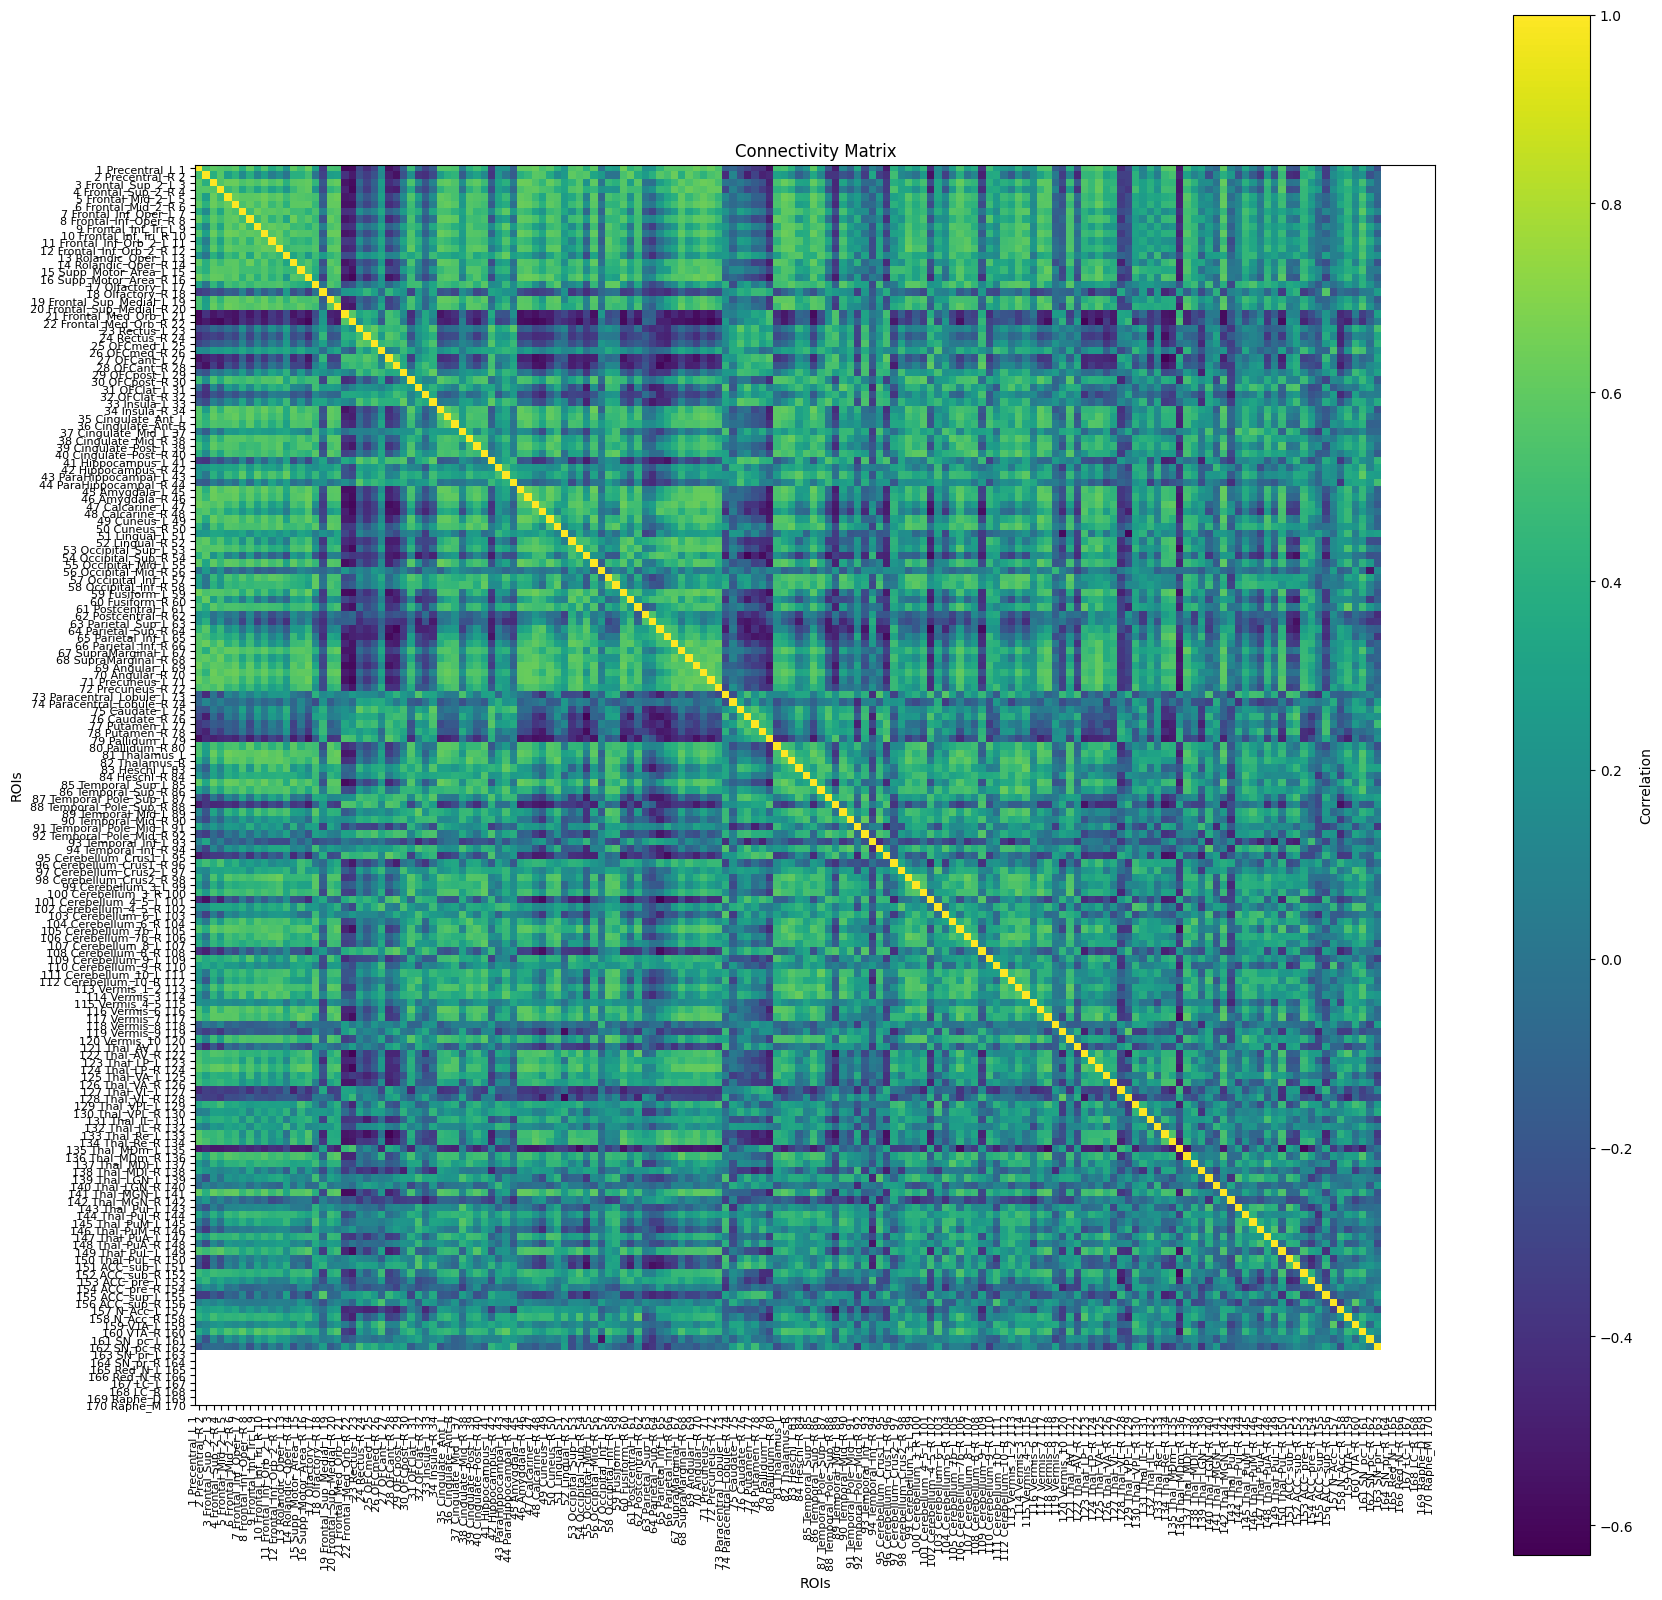

In [34]:

# Adjust the figure size to fit all labels
plt.figure(figsize=(20, 20))


plt.imshow(connectivity_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Connectivity Matrix')

plt.xticks(ticks=np.arange(len(roi_names)), labels=roi_names, rotation=90, ha='right', fontsize=8)
plt.yticks(ticks=np.arange(len(roi_names)), labels=roi_names, fontsize=8)

plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.show()


In [35]:
# Identify non-empty ROIs (ROIs with non-zero time series)
non_empty_rois = np.any(time_series, axis=0)
non_empty_indices = np.where(non_empty_rois)[0]

# Identify all ROIs from the atlas
all_rois = np.arange(len(roi_names))

# Determine missing ROIs
missing_rois = np.setdiff1d(all_rois, non_empty_indices)

# Print the missing ROIs
print("Missing ROIs indices:", missing_rois)
print("Missing ROIs names:", [roi_names[i] for i in missing_rois])

Missing ROIs indices: [162 163 164 165 166 167 168 169]
Missing ROIs names: ['163 SN_pr_L 163', '164 SN_pr_R 164', '165 Red_N_L 165', '166 Red_N_R 166', '167 LC_L 167', '168 LC_R 168', '169 Raphe_D 169', '170 Raphe_M 170']


In [36]:
healthy_ = connectivity_matrix

%store healthy_

np.savez('healthy_.npz', data = healthy_)

Stored 'healthy_' (ndarray)


In [37]:
dicom_folder = "/Users/mariamannone/Downloads/PPMI_6/100878/rsfMRI_RL/2022-03-29_09_56_04.0/I1571504/"

output_folder = "/Users/mariamannone/Desktop/new_phd_/DICOM_aal3_p2"


# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Convert DICOM to NIfTI using dicom2nifti
dicom_files = [os.path.join(dicom_folder, file) for file in os.listdir(dicom_folder) if file.endswith(".dcm")]

# Load the DICOM data
dicom_data = [pydicom.dcmread(file) for file in dicom_files]


# Convert DICOM to NIfTI
nifti_file_pd = os.path.join(output_folder, "output.nii.gz")
dicom2nifti.convert_directory(dicom_folder, nifti_file_pd, compression=True, reorient=True)



In [38]:

# Define the path to the NIfTI file
nifti_file_pd = "/Users/mariamannone/Desktop/new_phd_/DICOM_aal3_p2/output.nii.gz/301_rsfmri_rl.nii.gz"

#fmri_img_fu = nib.load(nifti_file_fu)

masker = input_data.NiftiLabelsMasker(labels_img=aal3_atlas_filename, standardize=True, memory='nilearn_cache')

# Load and standardize time series using the masker
time_series_pd = masker.fit_transform(nifti_file_pd)

# Compute the connectivity matrix (correlation)
correlation_measure_pd = connectome.ConnectivityMeasure(kind='correlation')
correlation_matrices_pd = correlation_measure_pd.fit_transform([time_series_pd])

# Extract the connectivity matrix
connectivity_matrix_pd = correlation_matrices_pd[0]



/Users/mariamannone/test2/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:805: UserWarning: After resampling the label image to the data image, the following labels were removed: {170, 133, 134}. Label image only contains 164 labels (including background).
  warnings.warn(


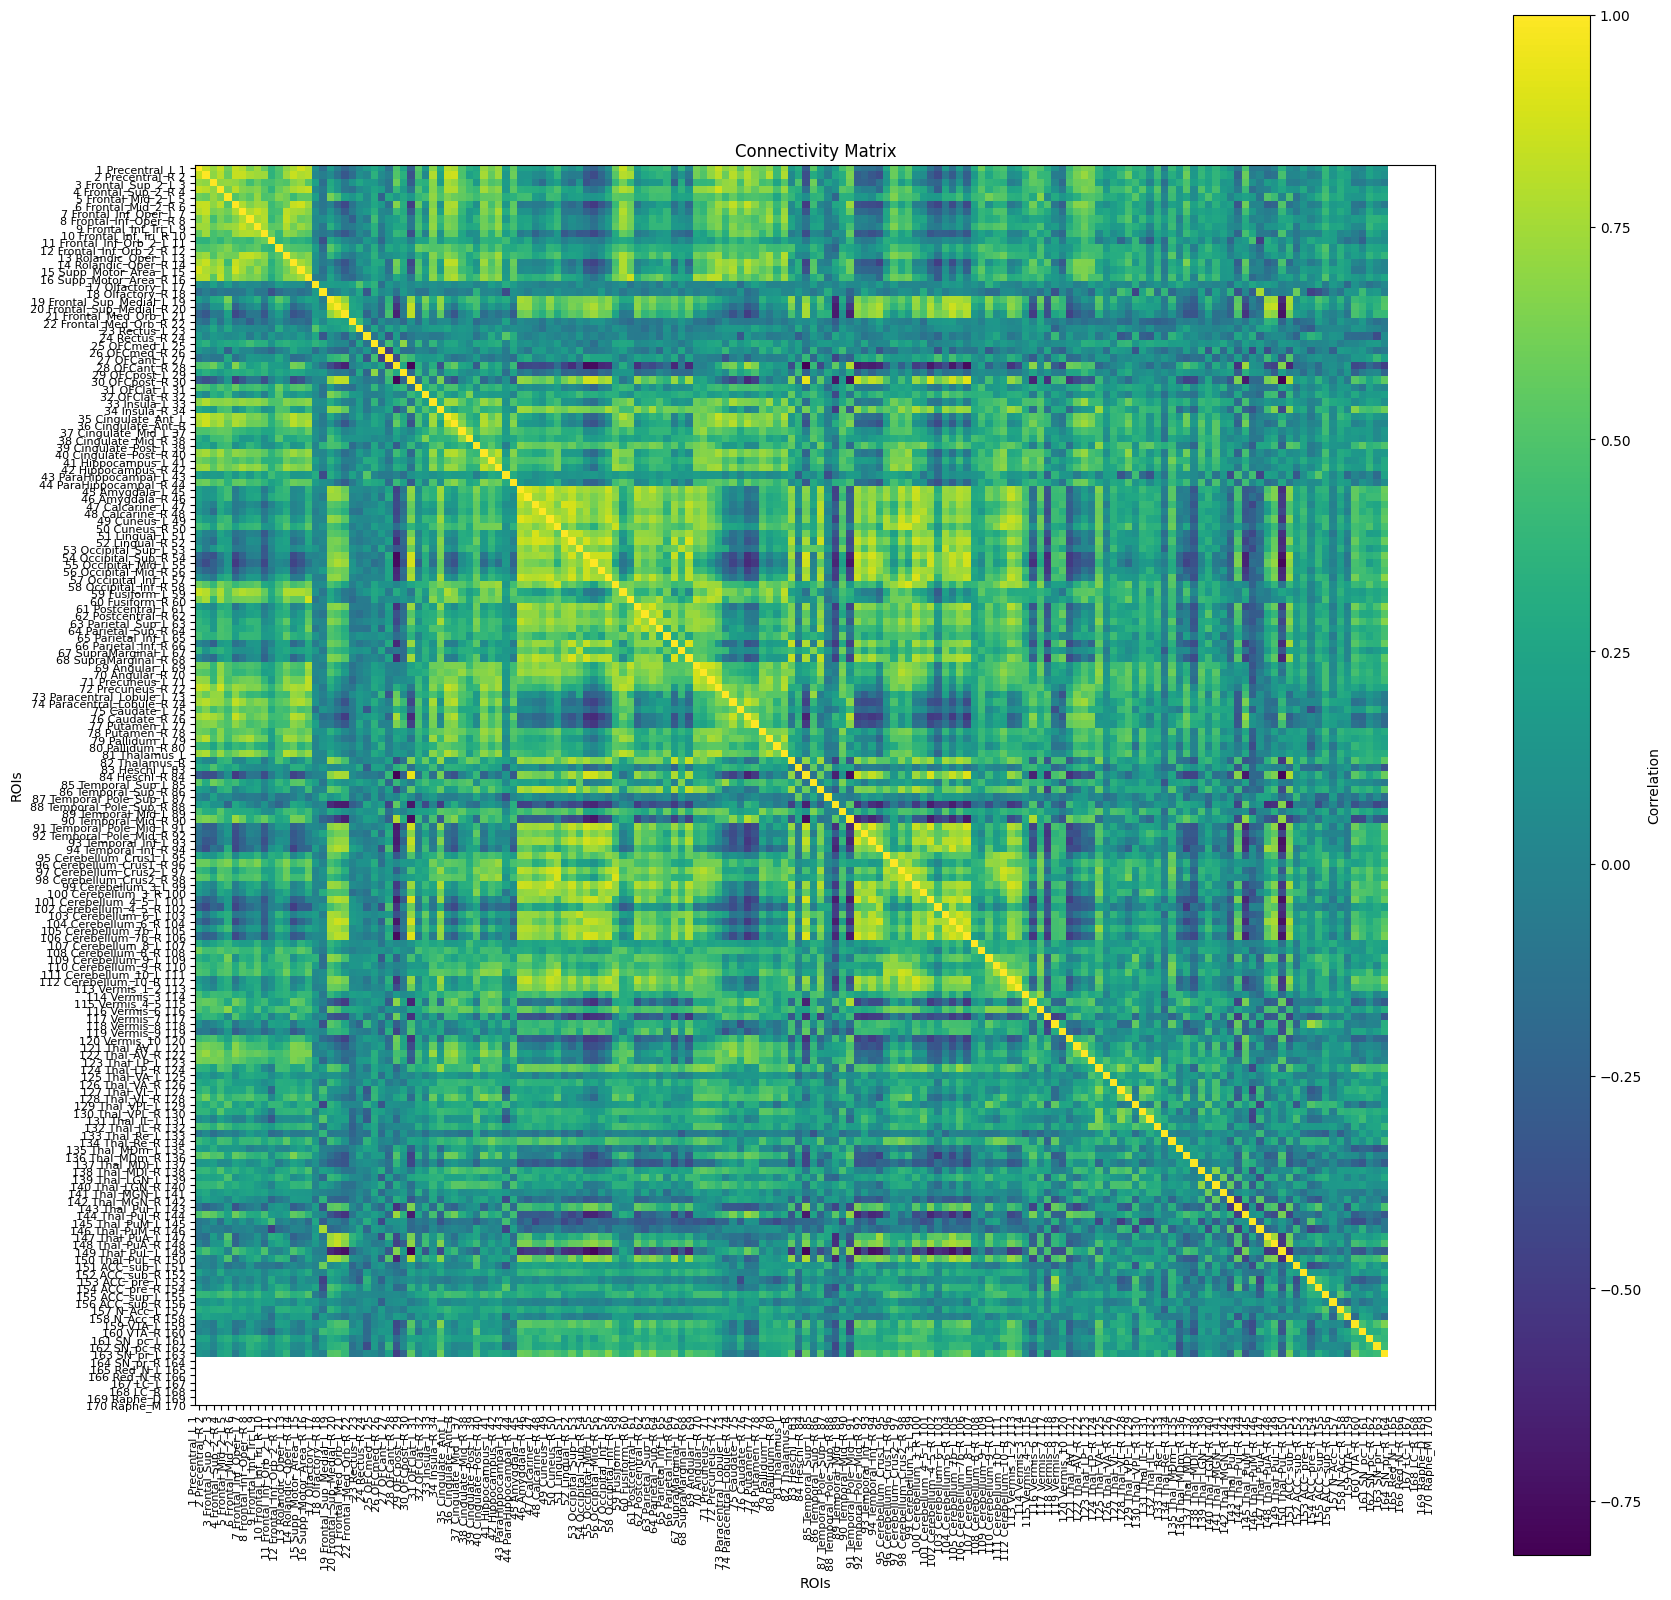

In [39]:
# Plot the connectivity matrix

# Adjust the figure size to fit all labels
plt.figure(figsize=(20, 20))


plt.imshow(connectivity_matrix_pd, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Connectivity Matrix')

plt.xticks(ticks=np.arange(len(roi_names)), labels=roi_names, rotation=90, ha='right', fontsize=8)
plt.yticks(ticks=np.arange(len(roi_names)), labels=roi_names, fontsize=8)

plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.show()


In [40]:
male_PD = connectivity_matrix_pd

%store male_PD

np.savez('male_FU.npz', data = male_PD)

Stored 'male_PD' (ndarray)


In [41]:
size1 = healthy_.size
size2 = male_PD.size
print(size1, size2)

26244 26569


In [42]:
print("Time series length for first dataset:", len(time_series))
print("Time series length for second dataset:", len(time_series_pd))

Time series length for first dataset: 10
Time series length for second dataset: 240


In [43]:
print("Number of ROIs for first dataset:", time_series.shape[1])
print("Number of ROIs for second dataset:", time_series_pd.shape[1])


Number of ROIs for first dataset: 162
Number of ROIs for second dataset: 163


In [44]:
# Identify non-empty ROIs (ROIs with non-zero time series)
non_empty_rois = np.any(time_series, axis=0)
non_empty_indices = np.where(non_empty_rois)[0]

# Identify all ROIs from the atlas
all_rois = np.arange(len(roi_names))

# Determine missing ROIs
missing_rois = np.setdiff1d(all_rois, non_empty_indices)

# Print the missing ROIs
print("Missing ROIs indices:", missing_rois)
print("Missing ROIs names:", [roi_names[i] for i in missing_rois])

Missing ROIs indices: [162 163 164 165 166 167 168 169]
Missing ROIs names: ['163 SN_pr_L 163', '164 SN_pr_R 164', '165 Red_N_L 165', '166 Red_N_R 166', '167 LC_L 167', '168 LC_R 168', '169 Raphe_D 169', '170 Raphe_M 170']


/Users/mariamannone/test2/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:805: UserWarning: After resampling the label image to the data image, the following labels were removed: {168, 133, 134, 167}. Label image only contains 163 labels (including background).
  warnings.warn(


Filtered Connectivity Matrix:
 [[ 1.          0.50587296  0.58420382 ...  0.36400278  0.06991328
  -0.23569696]
 [ 0.50587296  1.          0.39790345 ...  0.20248642 -0.22032575
  -0.07761805]
 [ 0.58420382  0.39790345  1.         ...  0.5113196   0.15732974
  -0.06096802]
 ...
 [ 0.36400278  0.20248642  0.5113196  ...  1.          0.25370773
   0.17745814]
 [ 0.06991328 -0.22032575  0.15732974 ...  0.25370773  1.
   0.05083517]
 [-0.23569696 -0.07761805 -0.06096802 ...  0.17745814  0.05083517
   1.        ]]


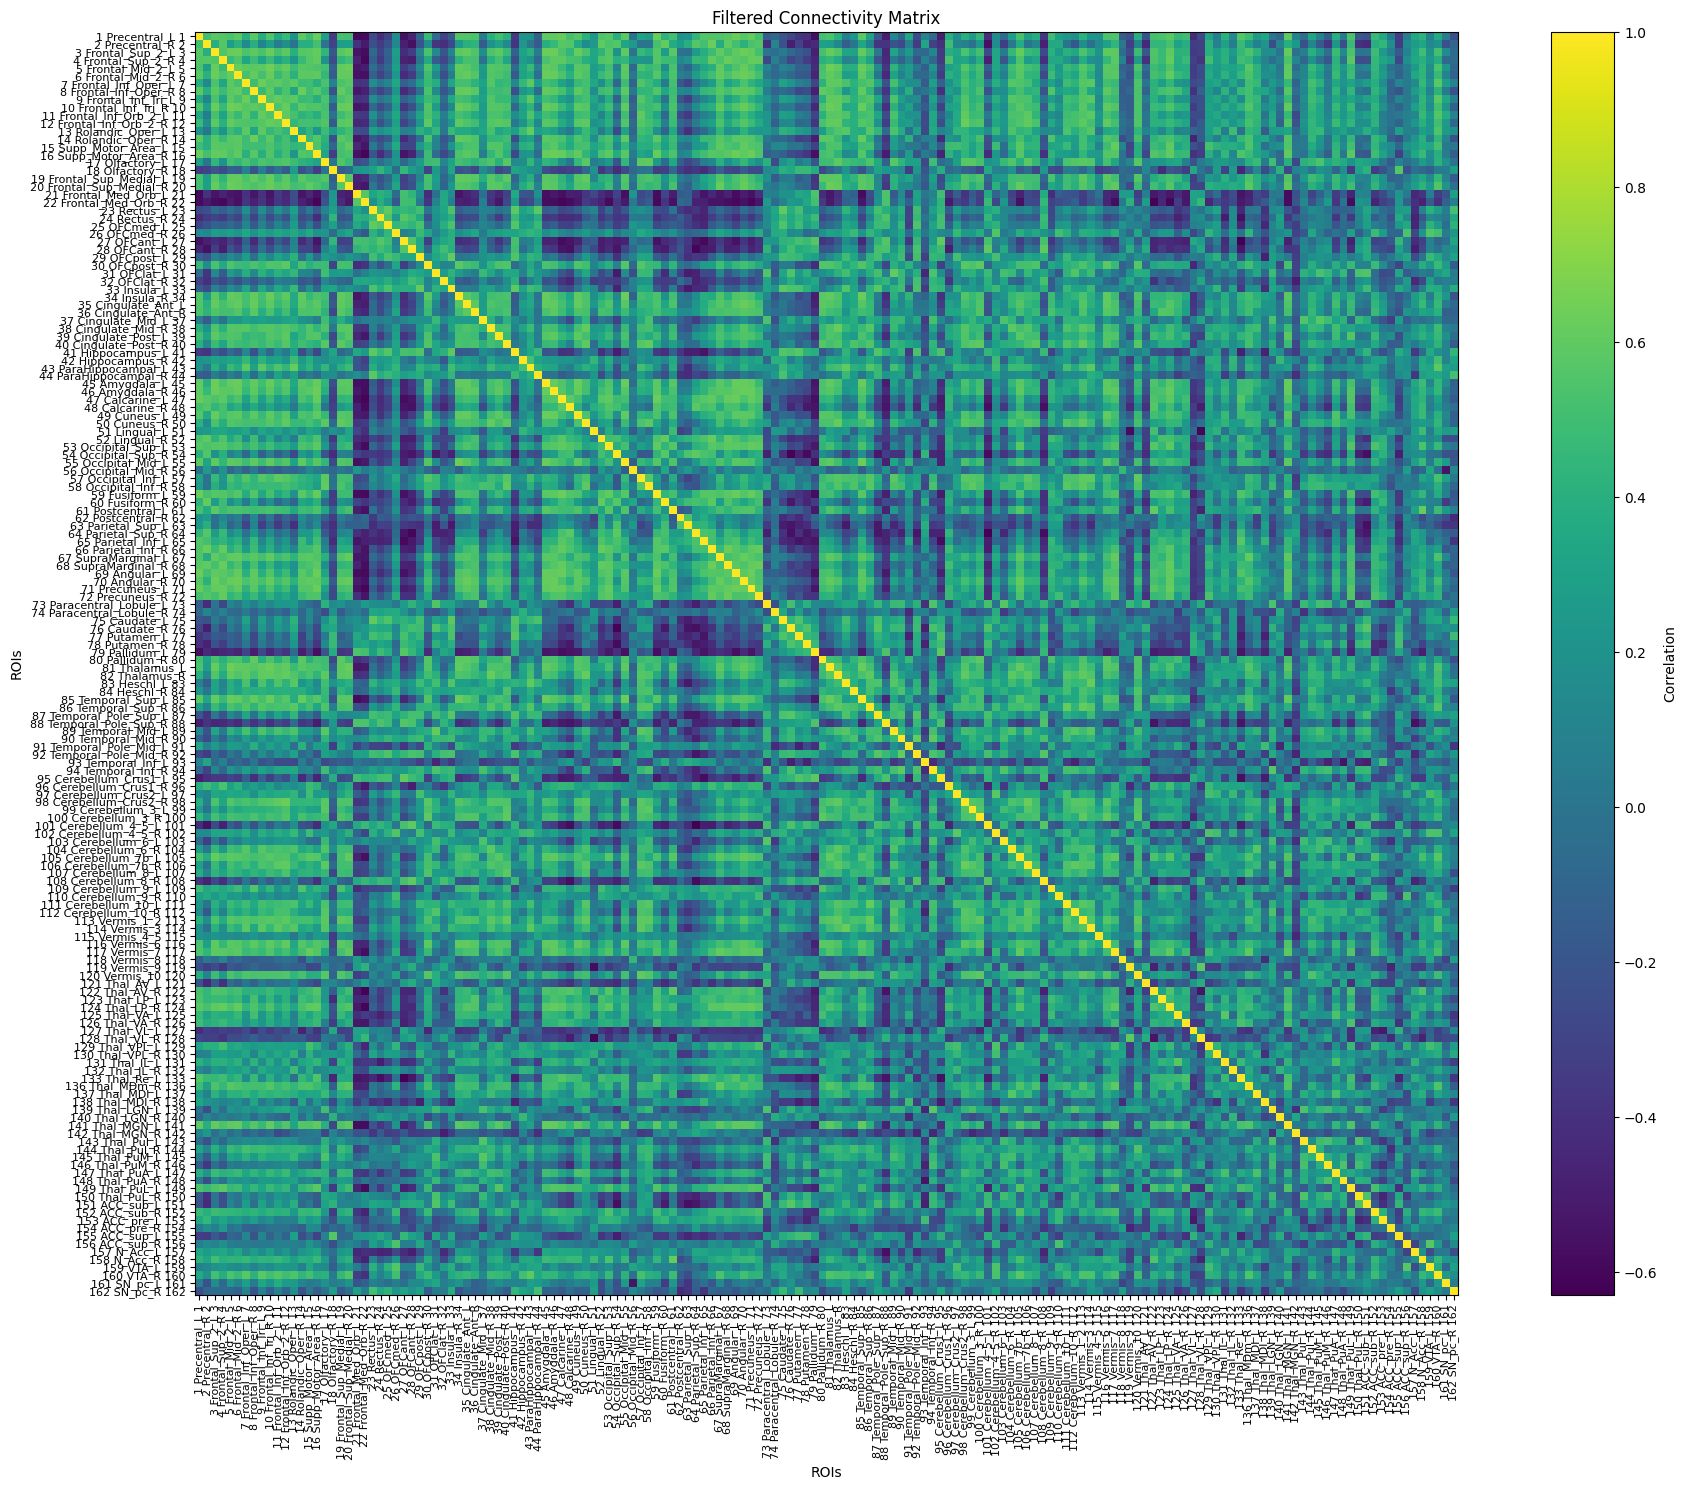

In [45]:
from nilearn import datasets, input_data, connectome
import numpy as np
import matplotlib.pyplot as plt

# healthy

# Define the path to the NIfTI file
nifti_file = "/Users/mariamannone/Desktop/new_phd_/DICOM_aal3_p1/output.nii.gz/9_rsfmri_lr.nii.gz"



# List of ROIs to filter out
rois_to_filter_out = [133, 134, 162, 163, 164, 165, 166, 167, 168, 169, 170]

# Create a masker using NiftiLabelsMasker
masker = input_data.NiftiLabelsMasker(labels_img=aal3_atlas_filename, standardize=True, memory='nilearn_cache')

# Extract time series from the fMRI image using the atlas
time_series = masker.fit_transform(nifti_file)

# Identify non-empty ROIs (ROIs with non-zero time series)
non_empty_rois = np.any(time_series, axis=0) # there should be correspondence between the two of them...
non_empty_indices = np.where(non_empty_rois)[0]

# Filter out the specified ROIs
filtered_indices = [i for i in non_empty_indices if i not in rois_to_filter_out]

# Filter the time series to include only the selected ROIs
filtered_time_series = time_series[:, filtered_indices]

# Compute the connectivity matrix
correlation_measure = connectome.ConnectivityMeasure(kind='correlation')
connectivity_matrix = correlation_measure.fit_transform([filtered_time_series])[0]

# Print the filtered connectivity matrix
print("Filtered Connectivity Matrix:\n", connectivity_matrix)

# Visualize the filtered connectivity matrix
plt.figure(figsize=(20, 15))
plt.imshow(connectivity_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Filtered Connectivity Matrix')
plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.xticks(ticks=np.arange(len(filtered_indices)), labels=[roi_names[i] for i in filtered_indices], rotation=90, fontsize=8)
plt.yticks(ticks=np.arange(len(filtered_indices)), labels=[roi_names[i] for i in filtered_indices], fontsize=8)
plt.tight_layout()
plt.show()

# Save the filtered connectivity matrix to a file
np.save('filtered_connectivity_matrix.npy', connectivity_matrix)

healthy_ = connectivity_matrix


/Users/mariamannone/test2/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:805: UserWarning: After resampling the label image to the data image, the following labels were removed: {170, 133, 134}. Label image only contains 164 labels (including background).
  warnings.warn(


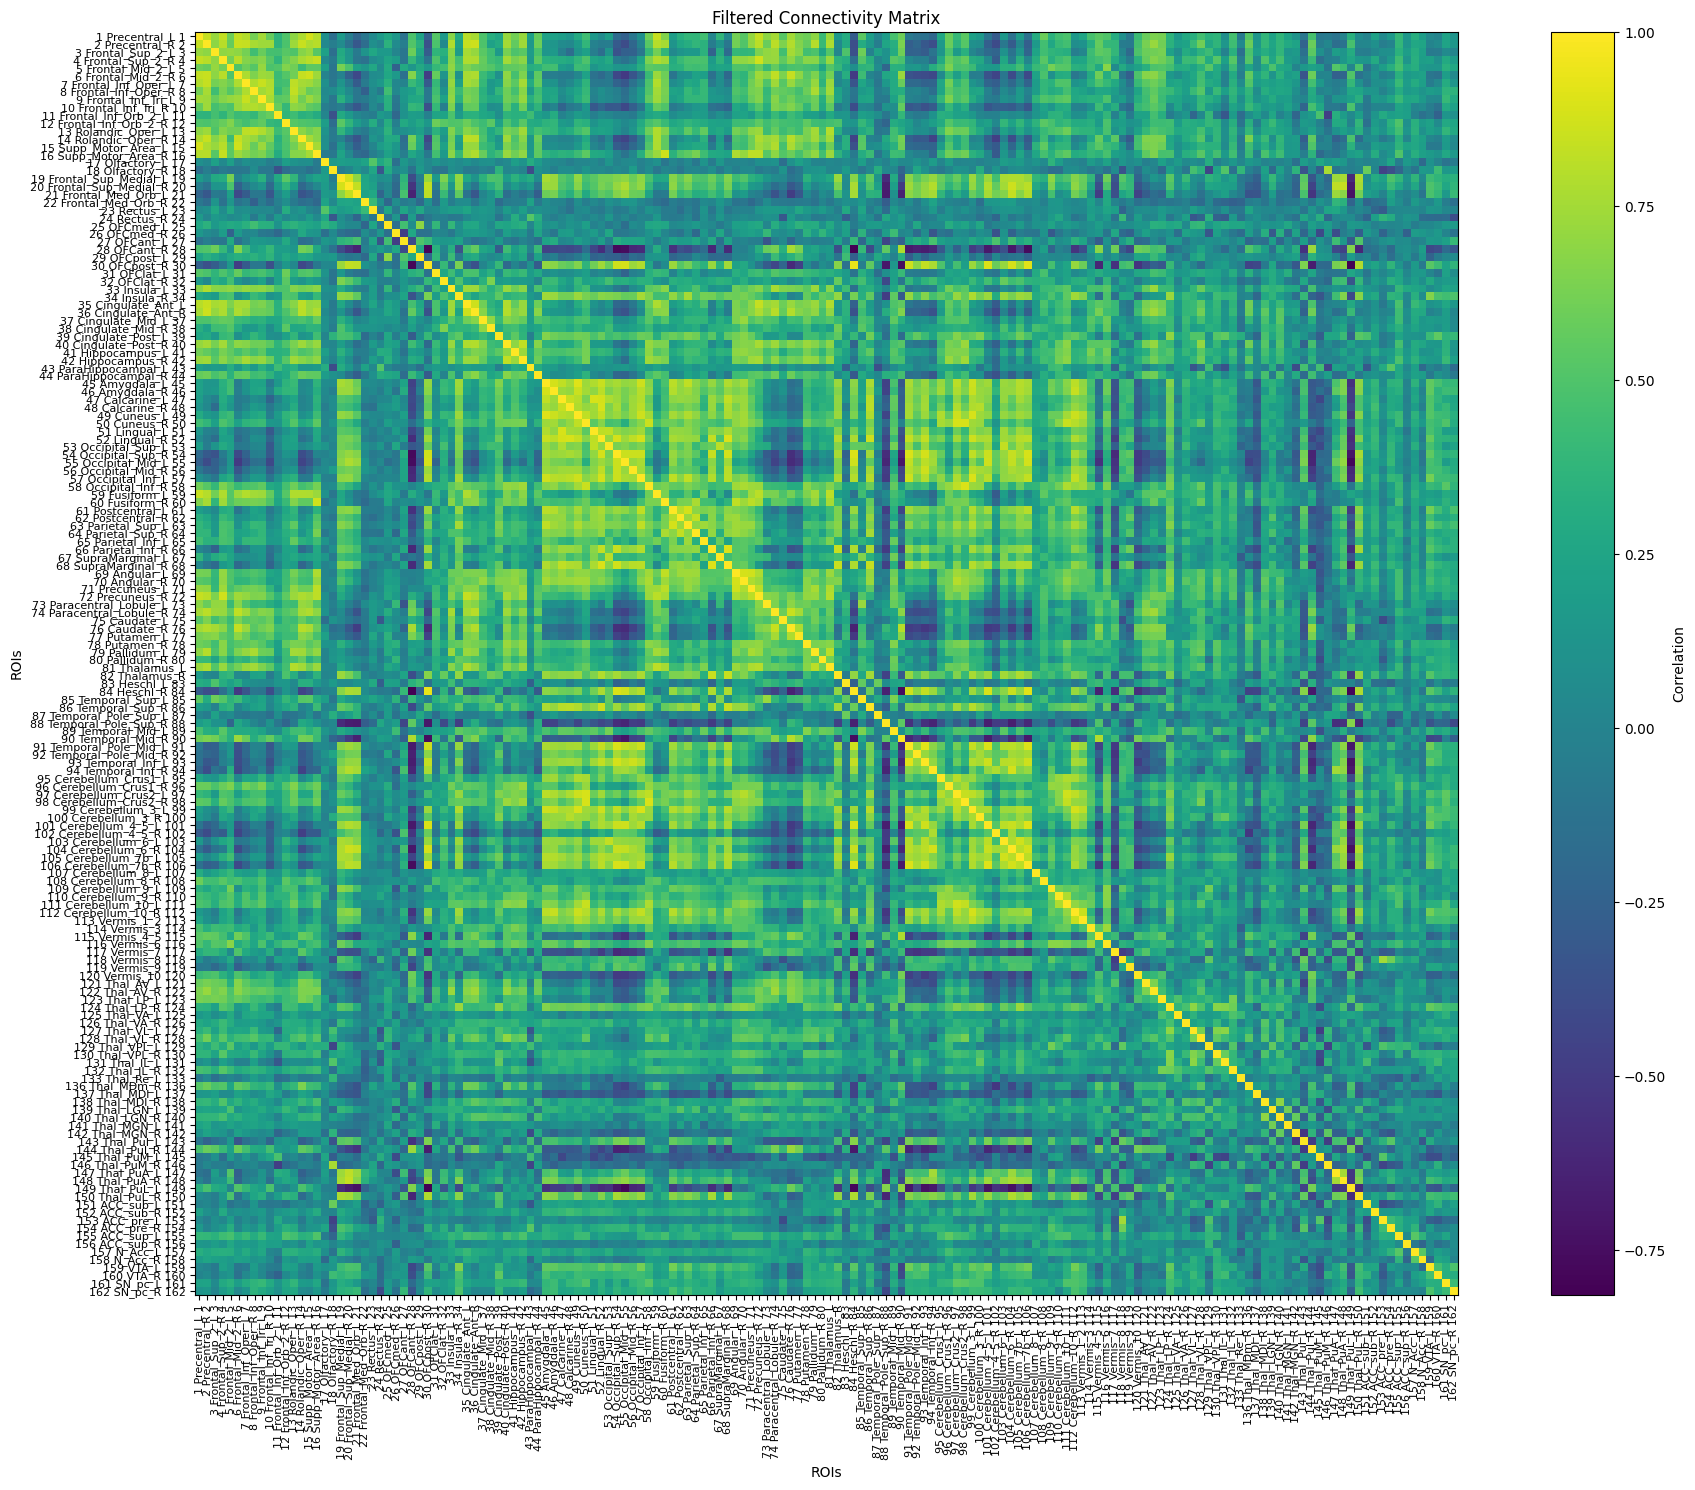

In [46]:


from nilearn import datasets, input_data, connectome
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the NIfTI file
nifti_file_pd = "/Users/mariamannone/Desktop/new_phd_/DICOM_aal3_p2/output.nii.gz/301_rsfmri_rl.nii.gz"


# List of ROIs to filter out
rois_to_filter_out = [133, 134, 162, 163, 164, 165, 166, 167, 168, 169, 170]

# Create a masker using NiftiLabelsMasker
masker = input_data.NiftiLabelsMasker(labels_img=aal3_atlas_filename, standardize=True, memory='nilearn_cache')

# Extract time series from the fMRI image using the atlas
time_series_pd = masker.fit_transform(nifti_file_pd)

# Identify non-empty ROIs (ROIs with non-zero time series)
non_empty_rois = np.any(time_series, axis=0) # there should be correspondence with the "most populated" one...
non_empty_indices = np.where(non_empty_rois)[0]

# Filter out the specified ROIs
filtered_indices = [i for i in non_empty_indices if i not in rois_to_filter_out]

# Filter the time series to include only the selected ROIs
filtered_time_series_pd = time_series_pd[:, filtered_indices]

# Compute the connectivity matrix
correlation_measure_pd = connectome.ConnectivityMeasure(kind='correlation')
connectivity_matrix_pd = correlation_measure_pd.fit_transform([filtered_time_series_pd])[0]


# Visualize the filtered connectivity matrix
plt.figure(figsize=(20, 15))
plt.imshow(connectivity_matrix_pd, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Filtered Connectivity Matrix')
plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.xticks(ticks=np.arange(len(filtered_indices)), labels=[roi_names[i] for i in filtered_indices], rotation=90, fontsize=8)
plt.yticks(ticks=np.arange(len(filtered_indices)), labels=[roi_names[i] for i in filtered_indices], fontsize=8)
plt.tight_layout()
plt.show()

# Save the filtered connectivity matrix to a file
np.save('filtered_connectivity_matrix_pd.npy', connectivity_matrix_pd)

male_PD = connectivity_matrix_pd


In [47]:


%store healthy_

np.savez('healthy_.npz', data = healthy_)


%store male_PD

np.savez('male_PD.npz', data = male_PD)

Stored 'healthy_' (ndarray)
Stored 'male_PD' (ndarray)


In [48]:
male_PD.size

25600

In [49]:
healthy_.size

25600

In [50]:

K_ = male_PD * np.linalg.inv(healthy_)

#K_ = male_PD @ np.linalg.inv(healthy_)




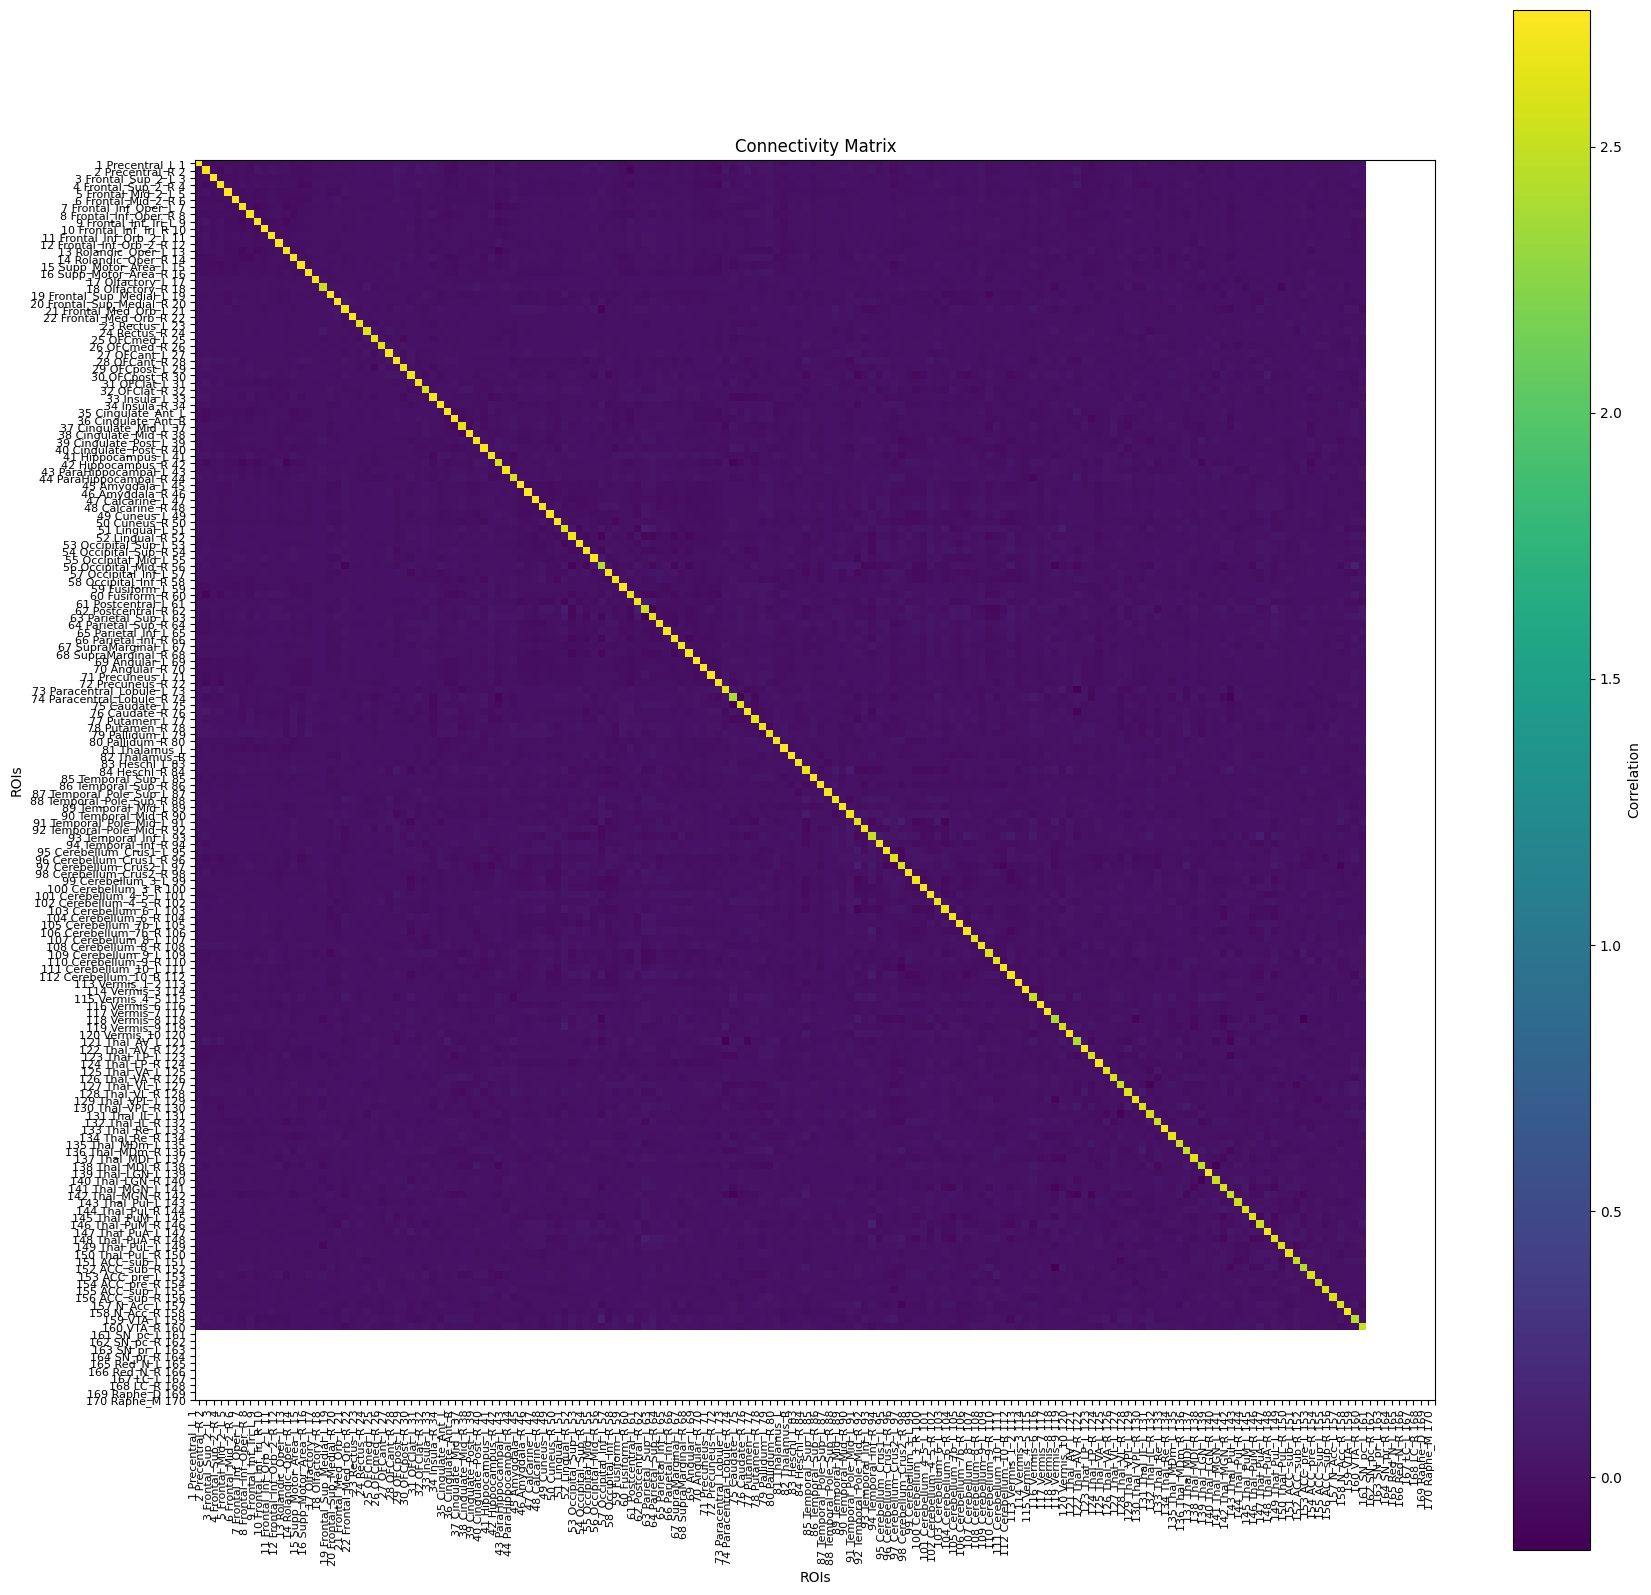

In [51]:
# Visualize K



# Adjust the figure size to fit all labels
plt.figure(figsize=(20, 20))

plt.imshow(K_, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Connectivity Matrix')

plt.xticks(ticks=np.arange(len(roi_names)), labels=roi_names, rotation=90, ha='right', fontsize=8)
plt.yticks(ticks=np.arange(len(roi_names)), labels=roi_names, fontsize=8)

plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.show()


In [52]:
# filtering out the smaller elements

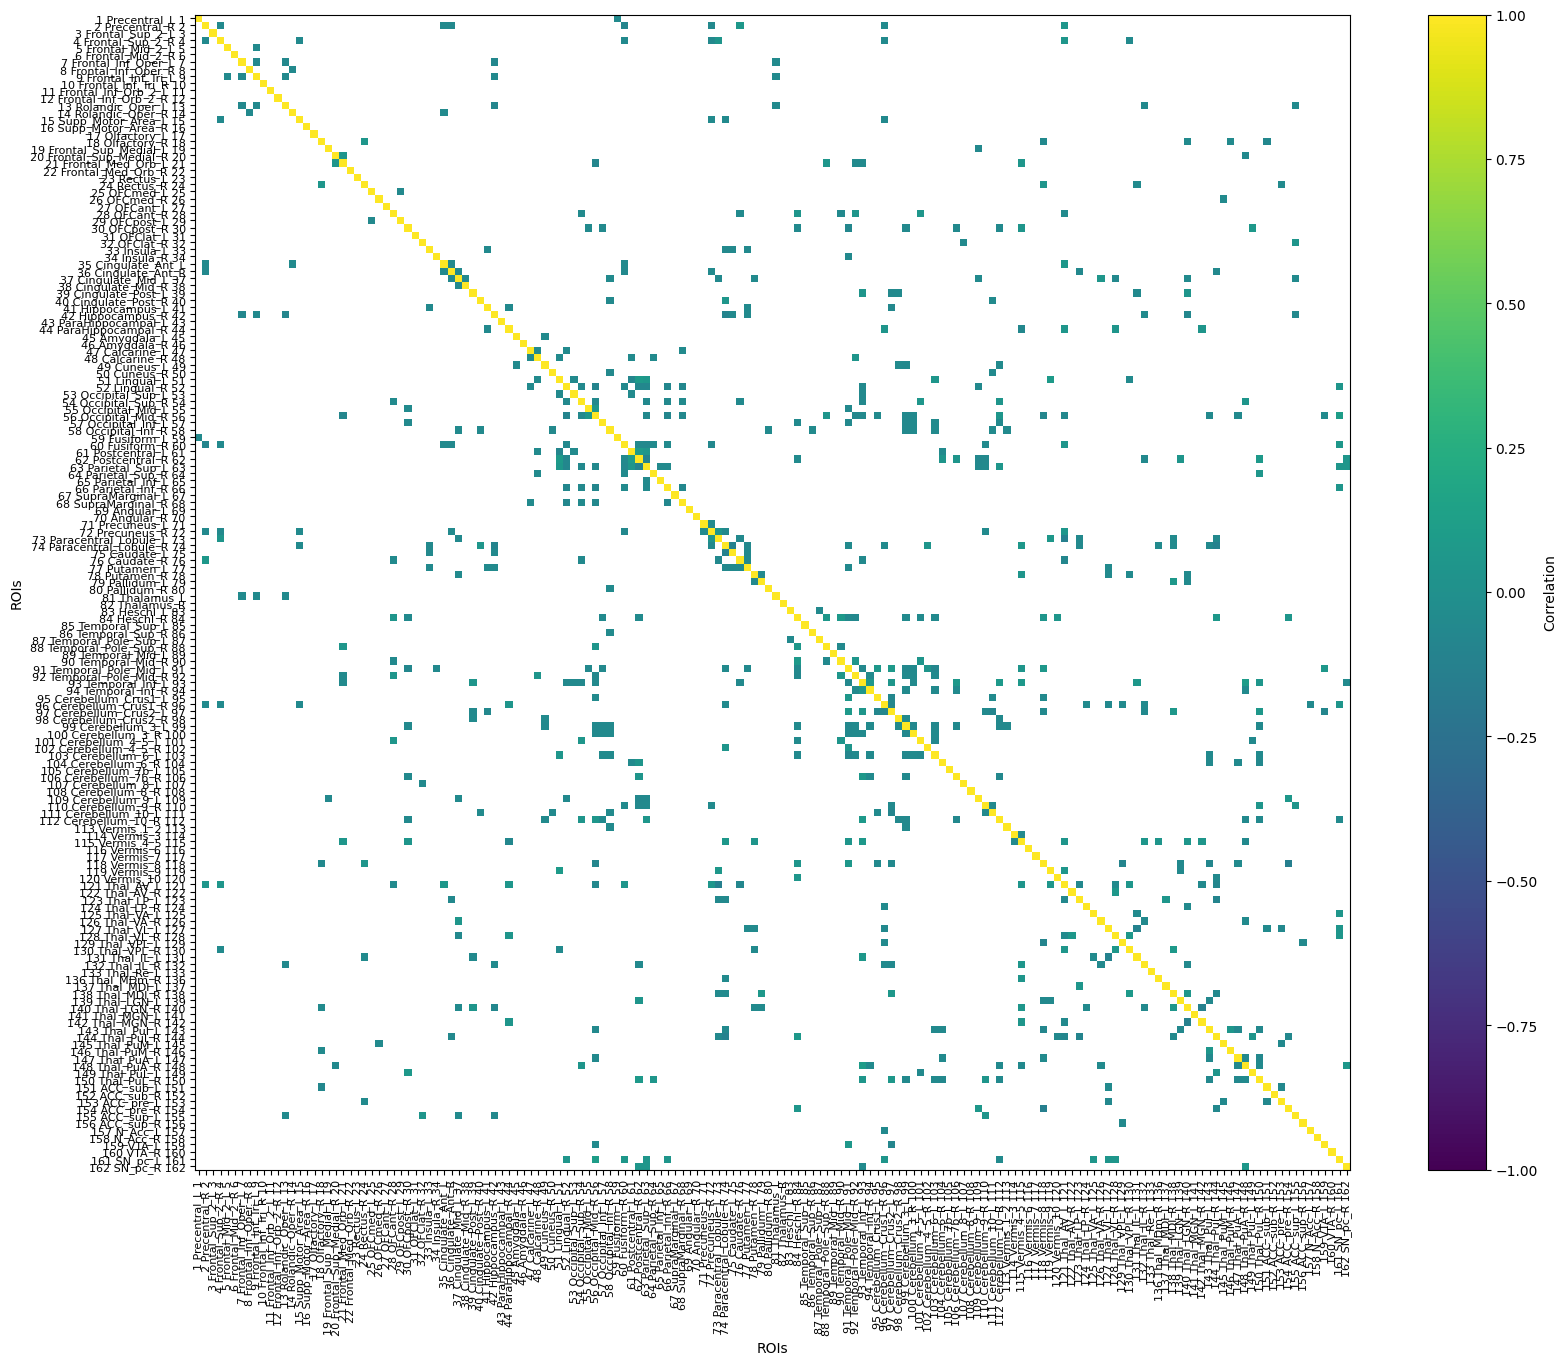

In [53]:
# Set the threshold
#threshold = 1.8
threshold = 0.04

# Create a boolean mask for the condition
mask = np.abs(K_) >= threshold  # True where absolute value is >= threshold

# Approach 2: Create a new matrix with only the elements >= 3, others as NaN (optional)
filtered_matrix = np.where(mask, K_, np.nan)  # Or use another value like 0

# Display the filtered matrices


# Adjust the figure size to fit all labels
plt.figure(figsize=(20, 15))

vmin, vmax = -1, 1  # Adjust these values as needed for your data
plt.imshow(filtered_matrix, cmap='viridis', interpolation='nearest', vmin=vmin, vmax=vmax)
plt.colorbar(label='Correlation')

#plt.xticks(ticks=np.arange(len(roi_names)), labels=roi_names, rotation=90, ha='right', fontsize=8)
#plt.yticks(ticks=np.arange(len(roi_names)), labels=roi_names, fontsize=8)

plt.xticks(ticks=np.arange(len(filtered_indices)), labels=[roi_names[i] for i in filtered_indices], rotation=90, fontsize=8)
plt.yticks(ticks=np.arange(len(filtered_indices)), labels=[roi_names[i] for i in filtered_indices], fontsize=8)

plt.xlabel('ROIs')
plt.ylabel('ROIs')
#plt.savefig('K_AAL3_filtered_PD_case_study_A.png', dpi=300)
plt.savefig('K_AAL3_filtered_PD_case_study_A.svg', format='svg')

#plt.savefig('K_AAL3_filtered_PD_case_study_A_other_product.png', dpi=300)
#plt.savefig('K_AAL3_filtered_PD_case_study_A_other_product.svg', format='svg')
plt.show()


/Users/mariamannone/test2/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:805: UserWarning: After resampling the label image to the data image, the following labels were removed: {168, 133, 134, 167}. Label image only contains 163 labels (including background).
  warnings.warn(


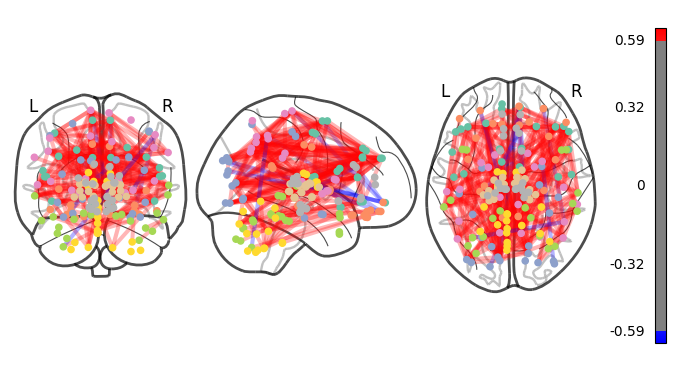

In [23]:
#

# June 5: print the connectome with the AAL3 atlas

#

from nilearn import input_data, plotting, connectome
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# Define the path to the NIfTI file and AAL3 atlas
nifti_file = "/Users/mariamannone/Desktop/new_phd_/DICOM_aal3_p1/output.nii.gz/9_rsfmri_lr.nii.gz"
aal3_atlas_filename = '/Users/mariamannone/Downloads/AAL3/AAL3v1.nii.gz'
aal3_labels_filename = '/Users/mariamannone/Downloads/AAL3/AAL3v1.nii.txt'

# Load the AAL3 atlas image
atlas_img = nib.load(aal3_atlas_filename)

# Create a masker using the AAL3 atlas
masker = input_data.NiftiLabelsMasker(labels_img=atlas_img, standardize=True, memory='nilearn_cache')
time_series = masker.fit_transform(nifti_file)

# Identify non-empty ROIs (ROIs with non-zero time series)
non_empty_rois = np.any(time_series, axis=0)
non_empty_indices = np.where(non_empty_rois)[0]

# Filter the time series to include only non-empty ROIs
filtered_time_series = time_series[:, non_empty_indices]

# Compute the connectivity matrix
correlation_measure = connectome.ConnectivityMeasure(kind='correlation')
connectivity_matrix = correlation_measure.fit_transform([filtered_time_series])[0]

# Load the AAL3 labels
with open(aal3_labels_filename, 'r') as f:
    labels = f.read().splitlines()

# Obtain the coordinates of the ROIs from the atlas
coords = plotting.find_parcellation_cut_coords(labels_img=atlas_img)

# Filter coordinates to include only those for non-empty ROIs
filtered_coords = [coords[i] for i in non_empty_indices]

# Plot the connectome
edge_properties = {
    'alpha': 0.3 # 0 is completely transparent, 1 is opaque
}

node_size = 20  # Adjust this value to change node size


plotting.plot_connectome(connectivity_matrix, filtered_coords, edge_threshold="98%", edge_kwargs=edge_properties, node_size = node_size, colorbar=True)

# Save the plot
plt.savefig('baseline_connectome.png', dpi=300)
plotting.show()


/Users/mariamannone/test2/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:805: UserWarning: After resampling the label image to the data image, the following labels were removed: {168, 133, 134, 167}. Label image only contains 163 labels (including background).
  warnings.warn(


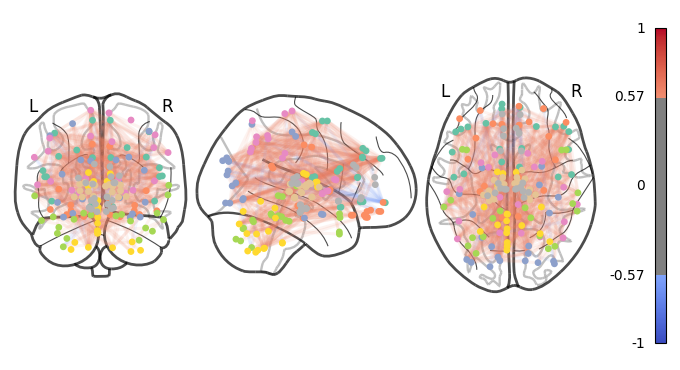

In [24]:
from nilearn import input_data, plotting, connectome
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Define the path to the NIfTI file and AAL3 atlas
nifti_file = "/Users/mariamannone/Desktop/new_phd_/DICOM_aal3_p1/output.nii.gz/9_rsfmri_lr.nii.gz"
aal3_atlas_filename = '/Users/mariamannone/Downloads/AAL3/AAL3v1.nii.gz'
aal3_labels_filename = '/Users/mariamannone/Downloads/AAL3/AAL3v1.nii.txt'

# Load the AAL3 atlas image
atlas_img = nib.load(aal3_atlas_filename)

# Create a masker using the AAL3 atlas
masker = input_data.NiftiLabelsMasker(labels_img=atlas_img, standardize=True, memory='nilearn_cache')
time_series = masker.fit_transform(nifti_file)

# Identify non-empty ROIs (ROIs with non-zero time series)
non_empty_rois = np.any(time_series, axis=0)
non_empty_indices = np.where(non_empty_rois)[0]

# Filter the time series to include only non-empty ROIs
filtered_time_series = time_series[:, non_empty_indices]

# Compute the connectivity matrix
correlation_measure = connectome.ConnectivityMeasure(kind='correlation')
connectivity_matrix = correlation_measure.fit_transform([filtered_time_series])[0]

# Load the AAL3 labels
with open(aal3_labels_filename, 'r') as f:
    labels = f.read().splitlines()

# Obtain the coordinates of the ROIs from the atlas
coords = plotting.find_parcellation_cut_coords(labels_img=atlas_img)

# Filter coordinates to include only those for non-empty ROIs
filtered_coords = np.array([coords[i] for i in non_empty_indices])

# Define edge properties with transparency for edges
#edge_kwargs = {'alpha': 0.02}

# Plot the connectome
edge_properties = {
    'alpha': 0.1 # 0 is completely transparent, 1 is opaque
}


# Plot the connectome with an edge threshold of the top 80% strongest edges
# and set edge_vmin and edge_vmax directly
node_size = 15  # Adjust this value to change node size

plotting.plot_connectome(
    connectivity_matrix,
    filtered_coords,
    edge_threshold="95%",
    edge_cmap='coolwarm',  # Use a colormap for edges
    edge_vmin=-1,  # Set the minimum edge value for colormap scaling
    edge_vmax=1,  # Set the maximum edge value for colormap scaling
    edge_kwargs=edge_properties,
    colorbar=True,
    node_size=node_size
)

# Save the plot
plt.savefig('baseline_connectome.png', dpi=300)
plt.show()


/Users/mariamannone/test2/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:805: UserWarning: After resampling the label image to the data image, the following labels were removed: {170, 133, 134}. Label image only contains 164 labels (including background).
  warnings.warn(


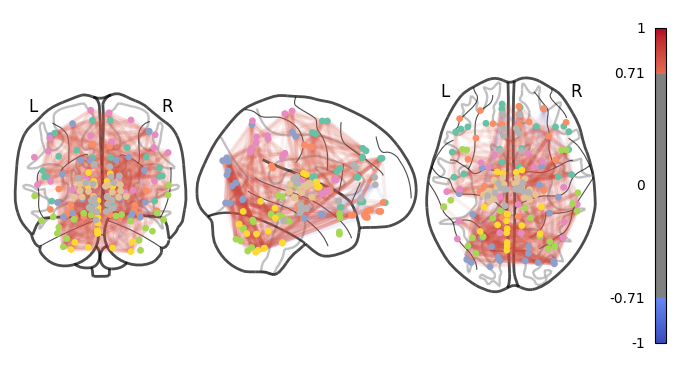

In [25]:
# diseased

from nilearn import input_data, plotting, connectome
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Define the path to the NIfTI file and AAL3 atlas

nifti_file_pd = "/Users/mariamannone/Desktop/new_phd_/DICOM_aal3_p2/output.nii.gz/301_rsfmri_rl.nii.gz"

aal3_atlas_filename = '/Users/mariamannone/Downloads/AAL3/AAL3v1.nii.gz'
aal3_labels_filename = '/Users/mariamannone/Downloads/AAL3/AAL3v1.nii.txt'

# Load the AAL3 atlas image
atlas_img = nib.load(aal3_atlas_filename)

# Create a masker using the AAL3 atlas
masker = input_data.NiftiLabelsMasker(labels_img=atlas_img, standardize=True, memory='nilearn_cache')
time_series_pd = masker.fit_transform(nifti_file_pd)

# Identify non-empty ROIs (ROIs with non-zero time series)
non_empty_rois_pd = np.any(time_series_pd, axis=0)
non_empty_indices_pd = np.where(non_empty_rois_pd)[0]

# Filter the time series to include only non-empty ROIs
filtered_time_series_pd = time_series_pd[:, non_empty_indices_pd]

# Compute the connectivity matrix
correlation_measure_pd = connectome.ConnectivityMeasure(kind='correlation')
connectivity_matrix_pd = correlation_measure.fit_transform([filtered_time_series_pd])[0]

# Load the AAL3 labels
with open(aal3_labels_filename, 'r') as f:
    labels = f.read().splitlines()

# Obtain the coordinates of the ROIs from the atlas
coords = plotting.find_parcellation_cut_coords(labels_img=atlas_img)

# Filter coordinates to include only those for non-empty ROIs
filtered_coords_pd = np.array([coords[i] for i in non_empty_indices_pd])

# Define edge properties with transparency for edges
#edge_kwargs = {'alpha': 0.02}

# Plot the connectome
edge_properties = {
    'alpha': 0.1 # 0 is completely transparent, 1 is opaque
}


# Plot the connectome with an edge threshold of the top 80% strongest edges
# and set edge_vmin and edge_vmax directly
node_size = 15  # Adjust this value to change node size

plotting.plot_connectome(
    connectivity_matrix_pd,
    filtered_coords_pd,
    edge_threshold="95%",
    edge_cmap='coolwarm',  # Use a colormap for edges
    edge_vmin=-1,  # Set the minimum edge value for colormap scaling
    edge_vmax=1,  # Set the maximum edge value for colormap scaling
    edge_kwargs=edge_properties,
    colorbar=True,
    node_size=node_size
)

# Save the plot
plt.savefig('baseline_connectome_pd.png', dpi=300)
plt.show()


In [ ]:
 # TO UPDATE



from nilearn import datasets

# Fetch the AAL atlas
aal = datasets.fetch_atlas_aal()

# Extract the labels from the AAL atlas
atlas_labels = aal.labels

# List of ROIs to find indices for
roi_names_selection = [
    "Occipital_Mid_R", "Occipital_Inf_L", "Occipital_Inf_R", "Fusiform_L", "Postcentral_R", 
    "Supramarginal_R", "Cerebelum_Crus1_R", "Cerebelum_3_L", "Cerebelum_4_5_R", "Cerebelum_8_L",
    "Cerebelum_9_R", "Cerebelum_10_L", "Cerebelum_10_R", "Vermis_6", "Vermis_7", "Vermis_8", 
    "Cingulum_Post_R", "Frontal_Inf_Tri_R", "Precentral_R", "Frontal_Sup_L", "Heschl_L", 
    "Pallidum_L", "Parietal_Inf_L", "Occipital_Mid_L", "Hippocampus_L", "Hippocampus_R",
    "ParaHippocampal_L", "Temporal_Mid_L", "Temporal_Mid_R", "ParaHippocampal_R"
]

# Get the indices for the specified ROI names
roi_indices_selection = [i for i, label in enumerate(atlas_labels) if label in roi_names_selection]

print("Indices for the specified ROIs:", roi_indices_selection)


In [ ]:
import numpy as np
from nilearn import datasets, plotting, input_data, connectome
import nibabel as nib

# Fetch the AAL atlas
aal_atlas = datasets.fetch_atlas_aal()

# Get the map and labels from the AAL atlas
atlas_filename = aal_atlas['maps']
atlas_labels = aal_atlas['labels']

# Load the NIfTI image to access coordinates
atlas_img = nib.load(atlas_filename)

# The coordinates for each ROI are obtained from the affine transformation
# and the indices where the atlas has a specific ROI value
unique_roi_values = np.unique(atlas_img.get_fdata())
roi_coords = []

# Find the center of each ROI in the atlas
for roi_value in unique_roi_values:
    if roi_value != 0:  # Skip background (value 0)
        roi_indices = np.argwhere(atlas_img.get_fdata() == roi_value)
        roi_center = np.mean(roi_indices, axis=0)  # Compute the mean position
        roi_coords.append(nib.affines.apply_affine(atlas_img.affine, roi_center))

# Now you have the coordinates for each ROI
roi_indices = [1, 2, 13, 35, 36, 37, 38, 39, 50, 51, 52, 53, 54, 57, 60, 74, 78, 84, 85, 91, 94, 97, 102, 105, 106, 107, 111, 112, 113]

# Extract only the coordinates that correspond to your selection
selected_coords = [roi_coords[i - 1] for i in roi_indices]

# Example: Filter a connectivity matrix to these indices
# Assuming you have a connectivity matrix
# connectivity_matrix = np.random.rand(116, 116)  # Replace with your matrix
connectivity_matrix_partial = connectivity_matrix[np.ix_(roi_indices, roi_indices)]
connectivity_matrix_fu_partial = connectivity_matrix_fu[np.ix_(roi_indices, roi_indices)]

edge_properties = {
    'alpha': 0.3 # 0 is completely transparent, 1 is opaque
}

# Plot the filtered connectome with the selected coordinates
plotting.plot_connectome(connectivity_matrix_partial, selected_coords, edge_threshold="80%", edge_kwargs=edge_properties, colorbar=True)
plt.savefig('baseline_partial_connectome_ADNI_002_S_5018.png', dpi=300)
plotting.show()

plotting.plot_connectome(connectivity_matrix_fu_partial, selected_coords, edge_threshold="80%", edge_kwargs=edge_properties, colorbar=True)
plt.savefig('fu_partial_connectome_ADNI_002_S_5018.png', dpi=300)
plotting.show()


In [ ]:
# female

In [ ]:
# test patient

In [ ]:
# prediction with MLP